<a href="https://colab.research.google.com/github/Amarjeet-1998/Amarjeet_Portfolio/blob/main/Crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Create pandas dataframe from crime_data.csv
data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.shape

(50, 5)

In [5]:
data.isnull().any()

Unnamed: 0    False
Murder        False
Assault       False
UrbanPop      False
Rape          False
dtype: bool

In [6]:
# remove the state column and copy the remaining data to another dataframe
mydata = data.iloc[:, data.columns!='Unnamed: 0']
print(mydata.head())

   Murder  Assault  UrbanPop  Rape
0    13.2      236        58  21.2
1    10.0      263        48  44.5
2     8.1      294        80  31.0
3     8.8      190        50  19.5
4     9.0      276        91  40.6


Text(0.5, 1.0, 'Elbow Curve to find optimum K')

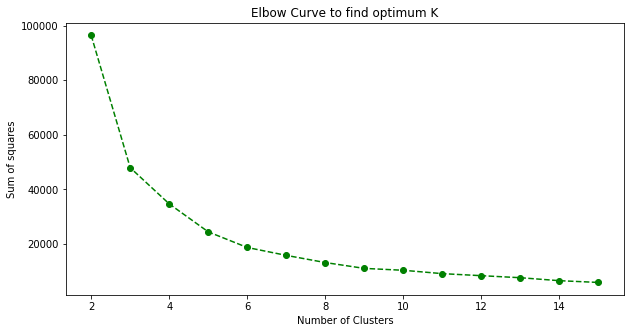

In [7]:
# Scree plot or Elbow curve to find K
k = list(range(2,16))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mydata)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squares')
plt.title('Elbow Curve to find optimum K') 

In [8]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(mydata)
data['Cluster5'] = kmeans5.labels_
data.head()
centroids = kmeans5.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])
# print(centroids)
# print(kmeans5.inertia_)
print(data.groupby('Cluster5').size())

Cluster5
0    10
1    11
2     6
3    13
4    10
dtype: int64


In [9]:
kmeans6 = KMeans(n_clusters=6)
kmeans6.fit(mydata)
data['Cluster6'] = kmeans6.labels_
data.head()
centroids = kmeans6.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])
print(centroids)
print(kmeans6.inertia_)
print(data.groupby('Cluster6').size())

      Murder     Assault   UrbanPop       Rape
0  11.500000  195.333333  66.166667  27.433333
1   2.950000   62.700000  53.900000  11.510000
2  11.950000  316.500000  68.000000  26.700000
3  11.766667  257.916667  68.416667  28.933333
4   5.590000  112.400000  65.600000  17.270000
5   5.750000  156.750000  74.000000  19.400000
18768.000666666667
Cluster6
0     6
1    10
2     4
3    12
4    10
5     8
dtype: int64


In [10]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [11]:
df_norm=norm_func(data.iloc[:,1:])

In [12]:
df_norm

,Murder,Assault,UrbanPop,Rape,Cluster5,Cluster6
0,0.746988,0.654110,0.440678,0.359173,0.25,0.6
1,0.554217,0.746575,0.271186,0.961240,0.25,0.6
2,0.439759,0.852740,0.813559,0.612403,0.50,0.4
3,0.481928,0.496575,0.305085,0.315245,0.75,0.0
4,0.493976,0.791096,1.000000,0.860465,0.25,0.6
5,0.427711,0.544521,0.779661,0.811370,0.75,0.0
6,0.150602,0.222603,0.762712,0.098191,0.00,0.8
7,0.307229,0.660959,0.677966,0.219638,0.25,0.6
8,0.879518,0.993151,0.813559,0.635659,0.50,0.4
9,1.000000,0.568493,0.474576,0.478036,0.25,0.0


<function matplotlib.pyplot.show>

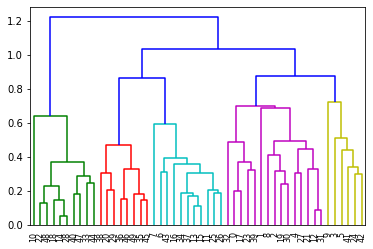

In [14]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))
plt.show

In [15]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [16]:
y_hc=hc.fit_predict(df_norm)

In [17]:
y_hc

array([1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 2])

In [18]:
data['h_clusterid']=hc.labels_

In [19]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster5,Cluster6,h_clusterid
0,Alabama,13.2,236,58,21.2,1,3,1
1,Alaska,10.0,263,48,44.5,1,3,1
2,Arizona,8.1,294,80,31.0,2,2,1
3,Arkansas,8.8,190,50,19.5,3,0,0
4,California,9.0,276,91,40.6,1,3,1
5,Colorado,7.9,204,78,38.7,3,0,0
6,Connecticut,3.3,110,77,11.1,0,4,2
7,Delaware,5.9,238,72,15.8,1,3,2
8,Florida,15.4,335,80,31.9,2,2,1
9,Georgia,17.4,211,60,25.8,1,0,1


## DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [21]:
data2 = pd.read_csv("crime_data.csv")
data2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [23]:
df=data2.iloc[:,1:5]

In [24]:
df.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [25]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [26]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [27]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [28]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [29]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [31]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [32]:
pd.concat([data2,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
